In [258]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [259]:
from scipy import signal 

In [260]:
data = pd.read_csv("dataset/dataframe_hrv.csv")

In [261]:
data.head()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,stress,time,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,0.0,12.529684,0.973684,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.0,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,0.0,30.503500,0.978261,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.0,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,0.0,52.523021,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,0.0,74.402170,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,0.0,96.219617,0.978723,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4129 entries, 0 to 4128
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECG                  4129 non-null   float64
 1   EMG                  4023 non-null   float64
 2   HR                   4129 non-null   float64
 3   RESP                 4129 non-null   float64
 4   Seconds              4129 non-null   float64
 5   footGSR              4129 non-null   float64
 6   handGSR              4056 non-null   float64
 7   interval in seconds  4129 non-null   float64
 8   marker               3722 non-null   float64
 9   newtime              4129 non-null   float64
 10  stress               4129 non-null   float64
 11  time                 4129 non-null   float64
 12  NNRR                 4129 non-null   float64
 13  AVNN                 4129 non-null   float64
 14  SDNN                 4007 non-null   float64
 15  RMSSD                4129 non-null   f

In [ ]:
from ydata_profiling import ProfileReport
report = ProfileReport(data)
report.to_file(output_file='report.html')


## EDA

In [264]:
data['stress'] = np.where(data['stress']>=0.5, 1, 0)

In [265]:
data.stress.nunique()

2

In [266]:
def preprocessing(data1):
    data1 = data1.reset_index()
    data1 = data1.replace([np.inf, -np.inf], np.nan)

    data1['HR'] = signal.medfilt(data1['HR'],13) 
    data1.fillna(data1.mean(),inplace=True)
    return data1

In [267]:
data = preprocessing(data)

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

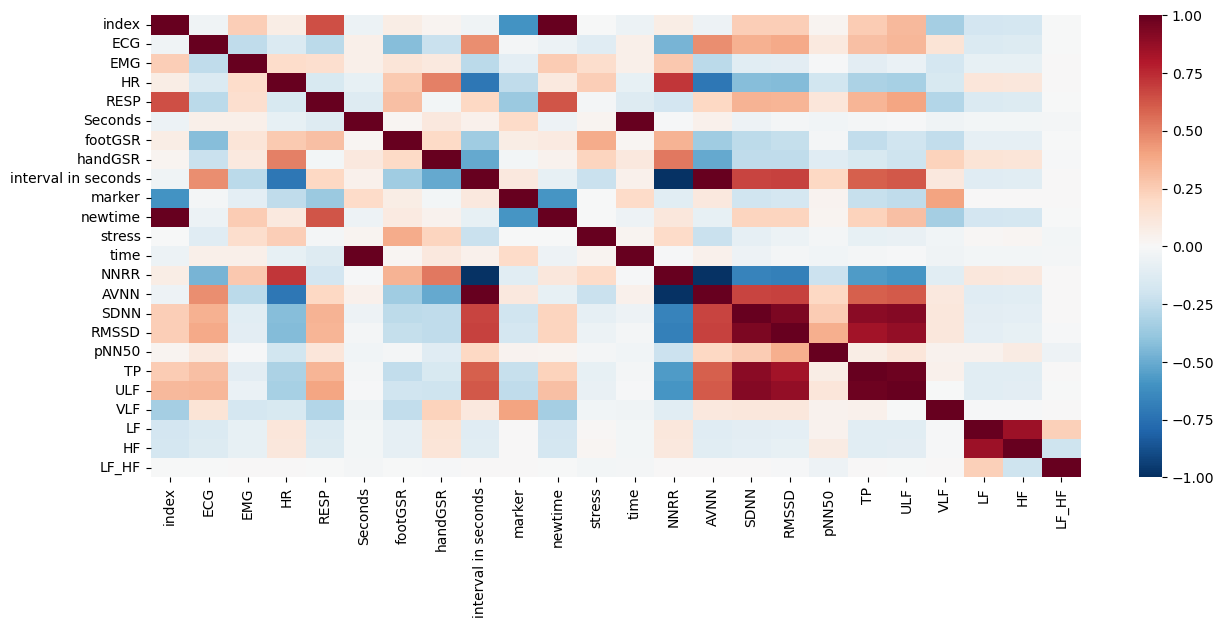

In [269]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu_r')
plt.show()

In [270]:
corr = data.corr()

In [272]:
data.corr()['stress'].sort_values()

AVNN                  -0.219761
interval in seconds   -0.219544
ECG                   -0.117624
SDNN                  -0.087153
TP                    -0.078893
ULF                   -0.072264
RMSSD                 -0.055820
VLF                   -0.037211
LF_HF                 -0.024498
RESP                  -0.019364
pNN50                 -0.015948
index                 -0.006594
marker                -0.003297
newtime               -0.002406
LF                     0.010578
HF                     0.020163
time                   0.026099
Seconds                0.026099
EMG                    0.179288
NNRR                   0.193135
handGSR                0.220786
HR                     0.246489
footGSR                0.370101
stress                 1.000000
Name: stress, dtype: float64

In [273]:
needed = ['HR','interval in seconds','AVNN', 'RMSSD', 'pNN50', 'VLF', 'HF']

X = data1[needed]
y = data1['stress']


In [274]:
X.head()

,HR,interval in seconds,AVNN,RMSSD,pNN50,VLF,HF
0,77.815789,0.614632,0.617297,0.015203,0.055556,0.000696,0.000135
1,79.521739,0.647826,0.647889,0.013858,0.045455,0.000009,0.000075
2,87.319149,0.646383,0.645000,0.000000,0.000000,0.000728,0.000001
3,87.702128,0.645000,0.645000,0.000000,0.000000,0.000728,0.000001
4,87.702128,0.645000,0.645000,0.000000,0.000000,0.000728,0.000001


In [275]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stress, dtype: int32

## Model Fitting

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=5, stratify=y)

In [278]:
x_train.shape, x_test.shape, y_train.shape ,y_test.shape

((3303, 7), (826, 7), (3303,), (826,))

In [279]:
#Various Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



models = []
models.append(('rf', RandomForestClassifier()))
models.append(('lr', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [281]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [280]:
models

[('rf', RandomForestClassifier()),
 ('lr', LogisticRegression()),
 ('CART', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('AdaBoost', AdaBoostClassifier()),
 ('GBM', GradientBoostingClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
         

In [109]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # Adjust 'average' as needed
    f1 = f1_score(y_test, y_pred, average='macro')  # Adjust 'average' as needed

    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

Model: rf
  Accuracy: 0.7700
  Recall: 0.7700
  F1 Score: 0.7696
------------------------------
Model: lr
  Accuracy: 0.5969
  Recall: 0.5970
  F1 Score: 0.5965
------------------------------
Model: CART
  Accuracy: 0.7530
  Recall: 0.7539
  F1 Score: 0.7529
------------------------------
Model: KNN
  Accuracy: 0.7397
  Recall: 0.7368
  F1 Score: 0.7373
------------------------------
Model: NB
  Accuracy: 0.5642
  Recall: 0.5607
  F1 Score: 0.5600
------------------------------
Model: SVM
  Accuracy: 0.6538
  Recall: 0.6458
  F1 Score: 0.6409
------------------------------
Model: AdaBoost
  Accuracy: 0.6768
  Recall: 0.6714
  F1 Score: 0.6704
------------------------------
Model: GBM
  Accuracy: 0.7046
  Recall: 0.6980
  F1 Score: 0.6964
------------------------------
Model: XGB
  Accuracy: 0.7663
  Recall: 0.7636
  F1 Score: 0.7643
------------------------------


In [124]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2,  # Output more detailed results
                           scoring='accuracy')  # You can change the scoring metric based on your need

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator (model with the best hyperparameters)
best_rf = grid_search.best_estimator_



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [282]:
#Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf=RandomForestClassifier( max_depth=40, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
m1=rf.fit(x_train,y_train)
y_pred=m1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")


  Accuracy: 0.7688
  Recall: 0.7690
  F1 Score: 0.7685


In [283]:
x_test['stress'] = y_pred 

In [284]:
x_test.head()

,HR,interval in seconds,AVNN,RMSSD,pNN50,VLF,HF,stress
1563,78.609756,0.766195,0.766000,0.010248,0.025641,0.000000,0.000000,0
1725,74.609024,0.839000,0.839000,0.000000,0.000000,0.000000,0.000000,1
1768,72.169854,0.847205,0.847421,0.010521,0.027027,0.000000,0.000000,0
177,84.068182,0.710000,0.710000,0.000000,0.000000,0.000728,0.000001,0
2475,78.243902,0.766195,0.766000,0.010248,0.025641,0.000000,0.000000,1


In [285]:
rmssd_mean = data1['RMSSD'].mean()
rmssd_std = data1['RMSSD'].std()
rmssd_25th_percentile = np.percentile(data1['RMSSD'], 25)

print(f"Mean RMSSD: {rmssd_mean}")
print(f"Standard Deviation RMSSD: {rmssd_std}")
print(f"25th Percentile RMSSD: {rmssd_25th_percentile}")

Mean RMSSD: 0.027222691671106802
Standard Deviation RMSSD: 0.01696428391829531
25th Percentile RMSSD: 0.0137433


In [286]:
def dep_calc(test_data='', predictor = "none",needed=''):
    test_data = preprocessing(test_data)
    data_for_pred = test_data[needed].fillna(0)
    pred = predictor.predict_proba(data_for_pred)
    
    dfpredict = pd.DataFrame(pred)

    dfpredict.columns = [["FALSE","TRUE"]]
    dfpredict['stress'] = np.where(dfpredict["TRUE"] > 0.5, 1, np.nan)

    
    test_data["stress"] = dfpredict["stress"]
    test_data.loc[test_data["steps"] > 30, 'stress'] = np.nan
    test_data['depression'] = ((test_data['stress'] == 1) & (test_data['RMSSD'] < 0.014)).astype(int)
    
    return test_data

## Prediction

In [289]:
df= pd.read_csv('dataset/Vikings/Female_24_years_old/dfnewHRV.csv')

In [290]:
df.head(1)

,calories,distance,floors,heart,interval in seconds,newtime,nntime,rrmedfilt,steps,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,HR
0,1.504656,0.0,0.0,84.6,0.688867,9563.733333,9563.733333,687.033333,0.0,0.966667,0.690552,0.071482,0.03319,0.142857,0.004869,0.004869,0.0,0.0,0.0,NaN,84.6


In [292]:
df= dep_calc(df,m1,needed)

In [293]:
df.head(1)

,index,calories,distance,floors,heart,interval in seconds,newtime,nntime,rrmedfilt,steps,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,HR,stress,depression
0,0,1.504656,0.0,0.0,84.6,0.688867,9563.733333,9563.733333,687.033333,0.0,0.966667,0.690552,0.071482,0.03319,0.142857,0.004869,0.004869,0.0,0.0,0.0,NaN,79.0,1.0,0


In [294]:
df.depression.value_counts()

depression
0    181
1      4
Name: count, dtype: int64

In [296]:
df[df.depression==1]

,index,calories,distance,floors,heart,interval in seconds,newtime,nntime,rrmedfilt,steps,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,HR,stress,depression
18,18,3.96576,0.0183,0.0,80.0,0.548027,3.768583e+05,3.768583e+05,548.324324,26.0,0.972973,0.548111,0.009340,0.005477,0.0,0.000086,0.000086,0.0,0.0,0.0,NaN,80.0,1.0,1
78,78,5.83200,0.0211,0.0,104.0,0.626000,1.592896e+06,1.592896e+06,625.437500,30.0,0.968750,0.626710,0.016642,0.009225,0.0,0.000273,0.000273,0.0,0.0,0.0,NaN,104.0,1.0,1
79,79,5.83200,0.0211,0.0,104.0,0.567500,1.613226e+06,1.613226e+06,567.805556,30.0,0.972222,0.566429,0.025267,0.009038,0.0,0.000607,0.000607,0.0,0.0,0.0,NaN,104.0,1.0,1
81,81,4.66560,0.0070,0.0,93.0,0.608364,1.653897e+06,1.653897e+06,608.363636,10.0,0.969697,0.609813,0.036983,0.009927,0.0,0.001298,0.001298,0.0,0.0,0.0,NaN,93.0,1.0,1
